# TEAM SIGMA

* B Pravena - PES2UG19CS076 
* Lavanya Yavagal - PES2UG19CS904
* Swarnamalya A S - PES2UG19CS418
* Varna Satyanarayana - PES2UG19CS448

# Regression Model: 

**a. Assumptions:**

* The relationship between High, Low, Open, Volume together with Close is assumed to be linear, we also later proved this by calculating the correlation between all columns of the given dataset
* Eventhough the columns High, Low, Open have a high correlation between each other, we are considering all of them to predict close value
* We took multicollinearity into consideration while predicting only for Ridge and Lasso

**b. Model Chosen with Rationale:**

We tested Ridge regression, Lasso regression, XGBoost and Multiple Linear Regression. 
We chose Multiple Linear Regression as our model as:
* This model did not overfit the data as much as the other models.
* Gave the best estimation between coeffecients of the independent variables (as there is a strong linear relationship between close and Open, High and Low)
* As there is a strong linear relationship between the independent varibales and dependent variable, multiple linear regression makes the most sense

**c. Parameters**

* We made use of Pipeline along with StandardScaler and LinearRegression to train our model of the entire train dataset

# Time Series Model: 

**a. Assumptions**

* We use the ARIMA (2,1,1) model for prediction which removes the trend component
* We found that the dataset is not stationary having both a trend and seasonal component
* We do not consider the seasonal component 

**b. Model Chosen with Rationale**

* With the help of acf and pacf plot, we found that p=1 and q=1
* With the help of auto arima, we found the optimal model: ARIMA(2,1,1) for training the model
* LSTM was also tested on the dataset as it was seen to be the best model during research for time series analysis

**c. Parameters**

* p=2, d=1, q=1, m=0, P=0, D=0, Q=0

# Comparison between Regression and Time Series models: 
**a. Based on validation performance metrics**

We ended up choosing the MLR model (RMSE=1.68) as we got a lower RMSE value for the given test data when compared to the ARIMA(2,1,1) model (RMSE=32.4)

**b. Which model is more suitable for the data? (account for not just best performance metrics, but handling of fluctuations of data as well)**

Eventhough SARIMA seems like the better option to consider the seasonality and trend component during prediction, the RMSE values obtained by the Multiple Linear Regression model was much lesser than the ARIMA value.
We obtained the values p=1 and q=1 from the PACF and ACF graphs respecively and used those as the base values for our model. As auto-ARIMA gives better and accurate results, we used the model generated from auto-ARIMA. The obtained ARIMA model was ARIMA(2,1,1) and this does not consider the seasonality changes, a very important factor. On performing seasonal decomposition on the given data set, we found that the time period for one seasonal cycle is 43-45 days (1 and a half months). When provided to the auto-ARIMA module, it still did not consider the seasonality of the data to perform predictions. When we tried changing P, D, Q and m values (m=45 or m=365), we got a system ran out of memory exception.

**c. Reasoning for what model is chosen to predict test (hidden) data**

According to our analysis, MLR gave better prediction and thus a lower RMSE value as fluctuations due to the seasonality component was captured well. The ARIMA model generated did not capture the seasonality component hence giving us a greater RMSE value as compared to the Multiple Linear Regression model. Since there was a high correlation between the Open, High, Low and Close values, we know a linear relationship exists between them. Hence, Multiple Linear Regression came out as the best model. We therefore followed the Occam's razor principle and decided on MLR. 

# EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pes-ec-dataanalytics-assign/sample_submission.csv
/kaggle/input/pes-ec-dataanalytics-assign/train.csv
/kaggle/input/pes-ec-dataanalytics-assign/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/train.csv')
df.set_index('Date', inplace=True)

In [3]:
x_t=pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/test.csv')
x_t.set_index('Date', inplace=True)
x_t=x_t.iloc[:,0:-1]

In [4]:
df.head()

,Open,High,Low,Volume,Close
Date,,,,,
14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


In [5]:
df.isna().sum()
#There are no null values

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [6]:
df.duplicated().sum()
#no duplicate values

0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

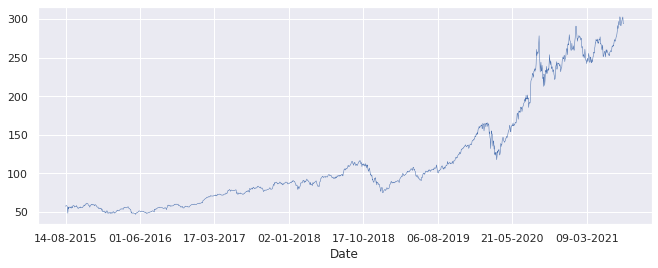

In [8]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Open'].plot(linewidth=0.5);
# there seems to be an upward trend and a multiplicative seasonality component

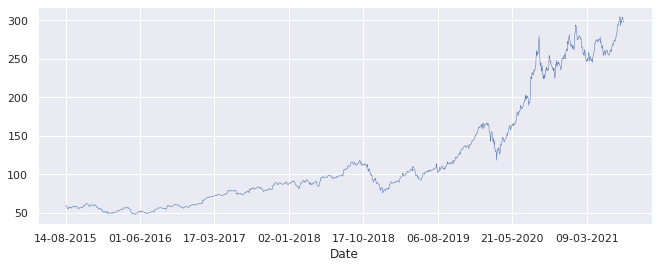

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})
df['High'].plot(linewidth=0.5);
# there seems to be an upward trend and a multiplicative seasonality component

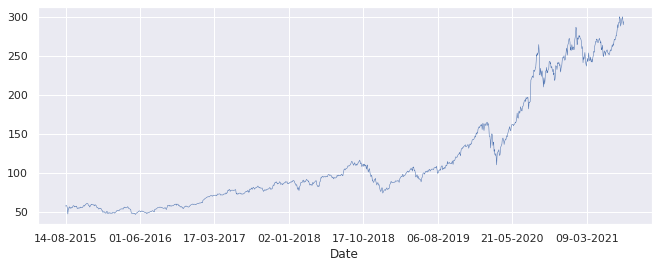

In [10]:
sns.set(rc={'figure.figsize':(11, 4)})
df['Low'].plot(linewidth=0.5);
# there seems to be an upward trend and a multiplicative seasonality component

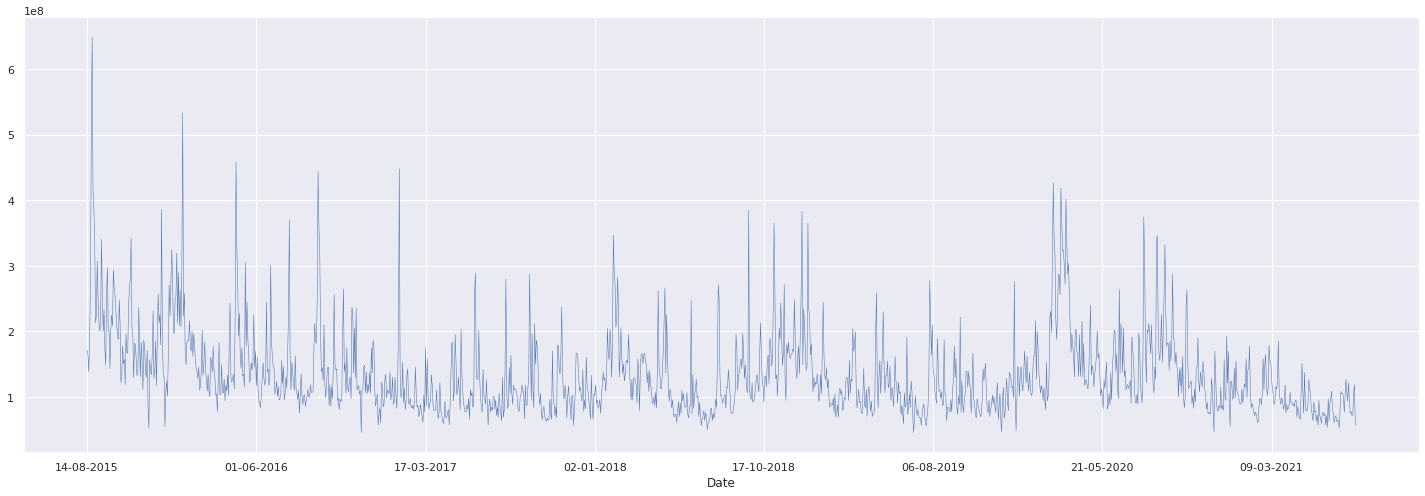

In [11]:
sns.set(rc={'figure.figsize':(25, 8)})
df['Volume'].plot(linewidth=0.5);
#since there seems to be a spike at similar intervals, we can say there is a seasonality component 

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_variables = df[['Open','High','Low','Volume']]
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,Open,14544.605261
1,High,11890.886948
2,Low,8172.422753
3,Volume,2.316143


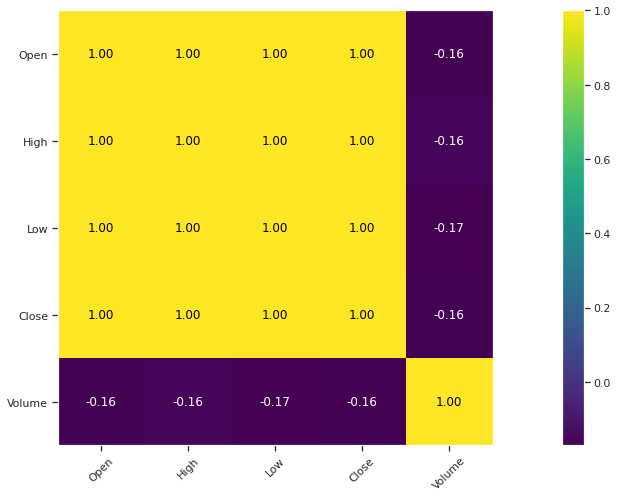

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
cols=['Open','High','Low','Close','Volume']
cm=np.corrcoef(df[cols].values.T)
hm=heatmap(cm,row_names=cols,column_names=cols)
plt.show()

In [14]:
df.corr()

,Open,High,Low,Volume,Close
Open,1.000000,0.999822,0.999744,-0.162110,0.999575
High,0.999822,1.000000,0.999684,-0.155877,0.999777
Low,0.999744,0.999684,1.000000,-0.170326,0.999782
Volume,-0.162110,-0.155877,-0.170326,1.000000,-0.163713
Close,0.999575,0.999777,0.999782,-0.163713,1.000000


Since correlation is high between open, high and low, we can use linear regression to predict the close value

<AxesSubplot:>

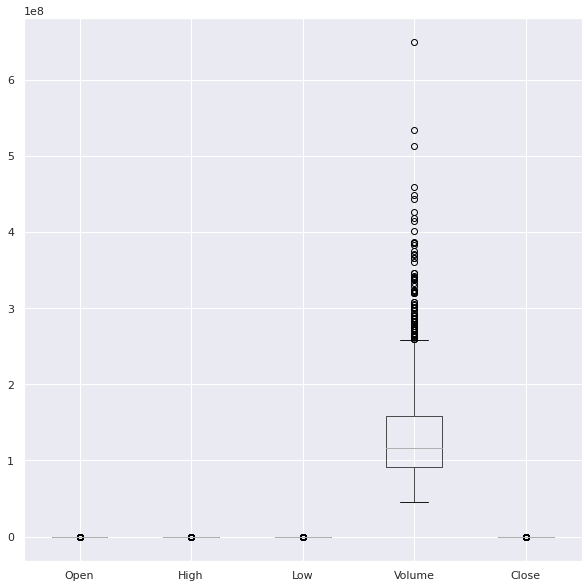

In [15]:
df.boxplot(figsize=(10,10))

In [16]:
no_of_outliers=dict()
for i in ['Open','High','Low','Volume']:
    Q1=df[i].quantile(q=0.25,interpolation='midpoint')
    Q3=df[i].quantile(q=0.75,interpolation='midpoint')
    IQR=Q3-Q1
    for j in df[i]:
        if j>Q3+1.5*IQR or j<Q1-1.5*IQR:
            if i not in no_of_outliers:
                no_of_outliers[i]=0
            else:
                no_of_outliers[i]+=1
print(no_of_outliers)

{'Open': 120, 'High': 117, 'Low': 116, 'Volume': 79}


# REGRESSION MODEL

We tried:
    Lasso
    Ridge
    Multiple Linear regression

In [17]:
from sklearn import metrics

In [18]:
from sklearn.model_selection import train_test_split
# X-> Contains the features
X = df.iloc[:, 0:-1]
# y-> Contains all the targets
y = df.iloc[:, -1]

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [19]:
# LASSO REGRESSION
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
prediction_lasso=lasso_regressor.predict(X_test)
print((metrics.mean_squared_error(y_test, prediction_lasso,squared=False)))


{'alpha': 1e-15}
-2.7106369096122256
1.894963985692697


In [20]:
#RIDGE REGRESSION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
#print(ridge_regressor.best_params_)
#print(ridge_regressor.best_score_)
prediction_ridge=ridge_regressor.predict(X_test)
print((metrics.mean_squared_error(y_test, prediction_ridge,squared=False)))


1.8446148147555788


In [21]:
#MULTIPLE LINEAR REGRESSION

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing as pre
import sklearn.linear_model as lm
import sklearn.datasets
import sklearn.neighbors as nb
import sklearn.pipeline as pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
import sklearn.neural_network as nn
import sklearn.neighbors as neigh
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split


dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
train = pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/train.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
df_test = pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/test.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
train
df=train

In [23]:
df

,Open,High,Low,Volume,Close
Date,,,,,
2015-08-14,57.484790,58.398406,57.342469,171718000,58.237720
2015-08-17,58.274453,59.013611,58.026536,163538800,58.788651
2015-08-18,58.453501,58.917197,58.260678,138242800,58.485638
2015-08-19,58.301997,58.494820,57.650069,193146000,57.801575
2015-08-20,57.374601,57.498558,56.249794,274006400,56.718082
...,...,...,...,...,...
2021-07-23,299.658540,301.995035,298.400415,71447400,301.675507
2021-07-26,301.096392,304.211720,299.958083,72434100,302.534241
2021-07-27,302.793811,302.973565,295.664509,104818600,298.100861


In [24]:
x=df.drop('Close', axis=1)
y=df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
pipe=pipeline.Pipeline(steps=[('scaler', StandardScaler()), ('model', lm.LinearRegression(normalize=True))])

In [26]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LinearRegression(normalize=True))])

In [27]:
x_testing = df_test.drop('Close', axis=1)
lr_p_testing = pipe.predict(x_testing)

In [28]:
lr_p_testing

array([295.87229949, 296.39586744, 298.69502811, 298.2697551 ,
       298.52156078, 297.65186081, 296.98172948, 298.07524467,
       297.18946873, 301.32462356, 302.42123867, 303.22446674,
       305.91239611, 300.67377767, 298.92074781, 300.40435889,
       303.84311028, 305.51908927, 302.33665302, 301.5019451 ,
       300.85382244, 309.57168301, 308.26803763, 313.19425689,
       311.74833262, 312.69671352, 317.5725784 , 314.50128259,
       314.52055113, 306.55180097])

In [29]:
ndf=pd.DataFrame()
ndf['Date']=df_test.index
ndf['Close']=lr_p_testing
ndf.set_index('Date',inplace=True)
#ndf.to_csv('LinearRegression.csv')
ndf.to_csv('8790.csv')

# TIME SERIES

In [30]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 517 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train=pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/train.csv')
test=pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/test.csv')
train
df=test

In [32]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')

In [33]:
t1= pd.read_csv('/kaggle/input/pes-ec-dataanalytics-assign/train.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)

In [34]:
t1

,Open,High,Low,Volume,Close
Date,,,,,
2015-08-14,57.484790,58.398406,57.342469,171718000,58.237720
2015-08-17,58.274453,59.013611,58.026536,163538800,58.788651
2015-08-18,58.453501,58.917197,58.260678,138242800,58.485638
2015-08-19,58.301997,58.494820,57.650069,193146000,57.801575
2015-08-20,57.374601,57.498558,56.249794,274006400,56.718082
...,...,...,...,...,...
2021-07-23,299.658540,301.995035,298.400415,71447400,301.675507
2021-07-26,301.096392,304.211720,299.958083,72434100,302.534241
2021-07-27,302.793811,302.973565,295.664509,104818600,298.100861


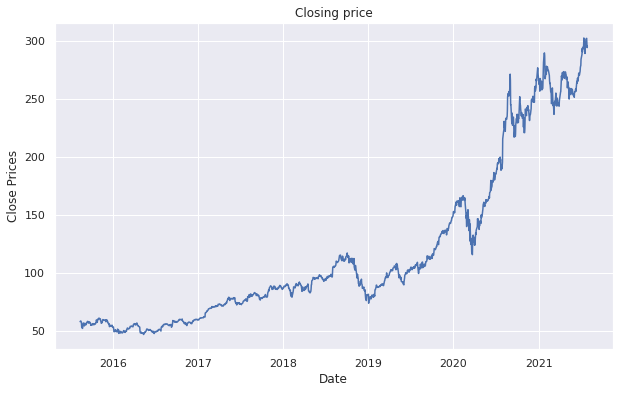

In [35]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(t1['Close'])
plt.title('Closing price')
plt.show()

<AxesSubplot:ylabel='Density'>

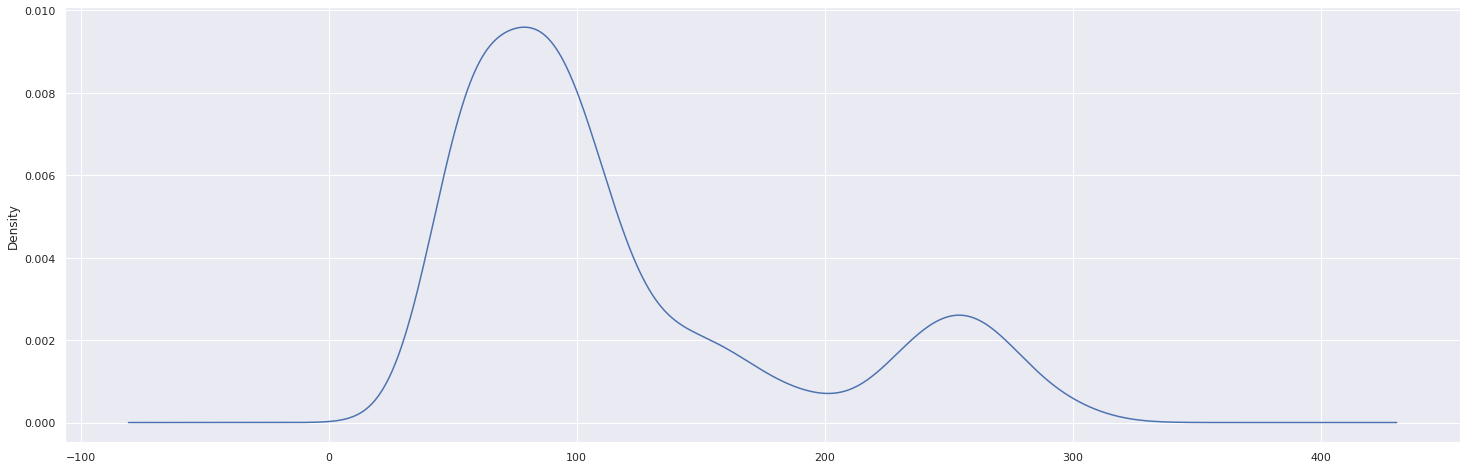

In [36]:
#Distribution of the dataset
df_close = t1['Close']
df_close.plot(kind='kde')

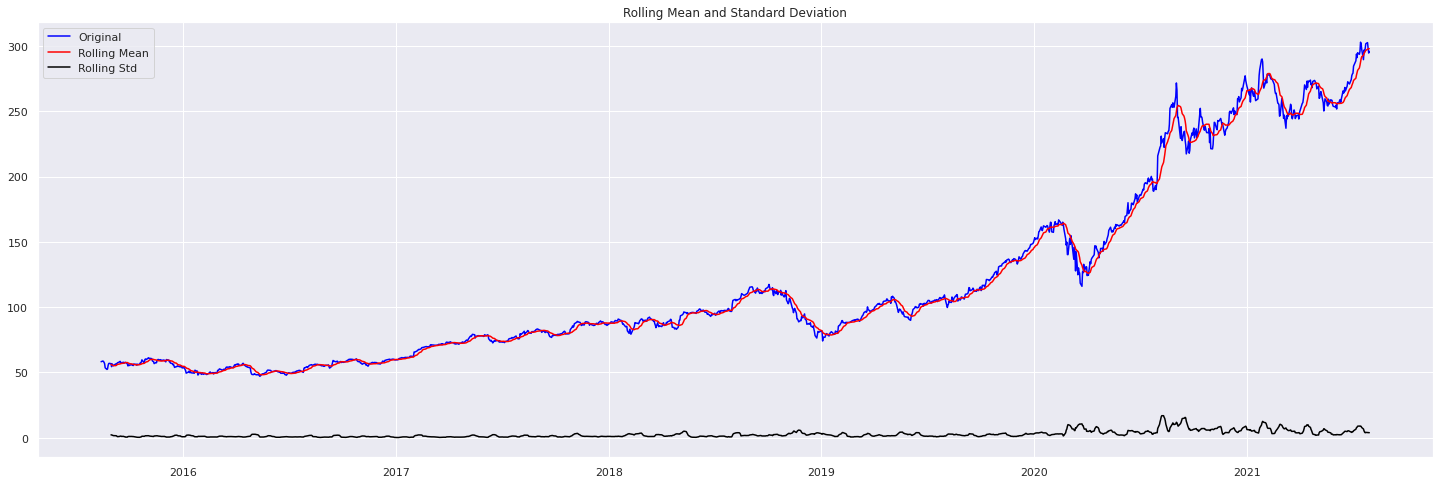

Results of dickey fuller test
Test Statistics                   1.344565
p-value                           0.996847
No. of lags used                 24.000000
Number of observations used    1475.000000
critical value (1%)              -3.434791
critical value (5%)              -2.863501
critical value (10%)             -2.567814
dtype: float64


In [37]:
#Test for stationarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 1800x576 with 0 Axes>

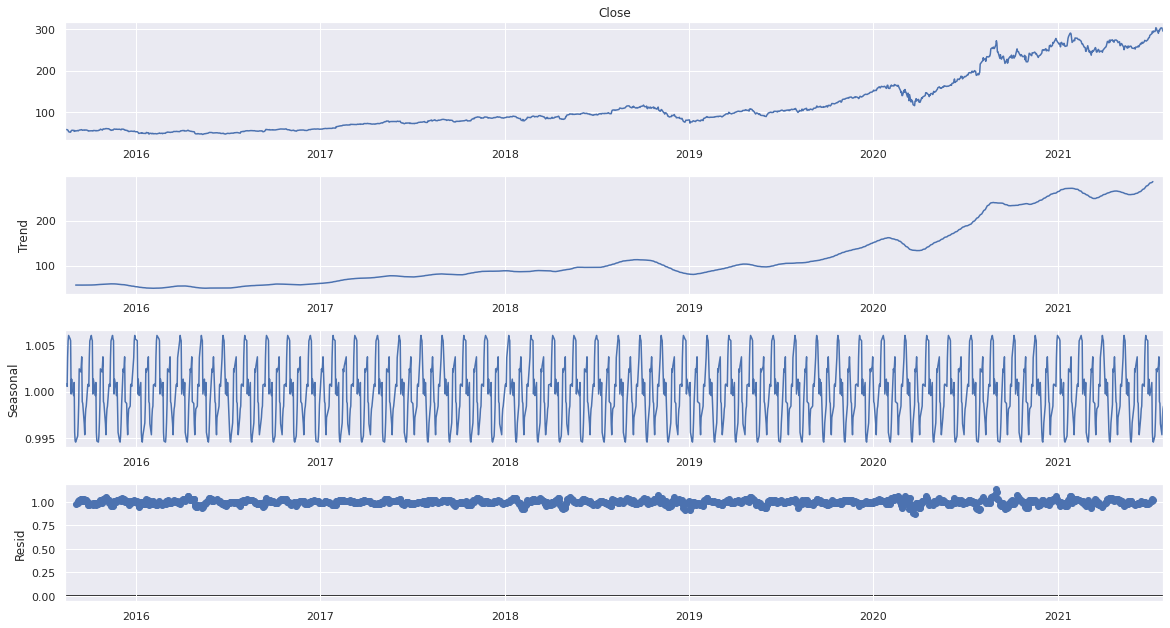

In [38]:
#To separate the trend and the seasonality from a time series, we can decompose the series
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

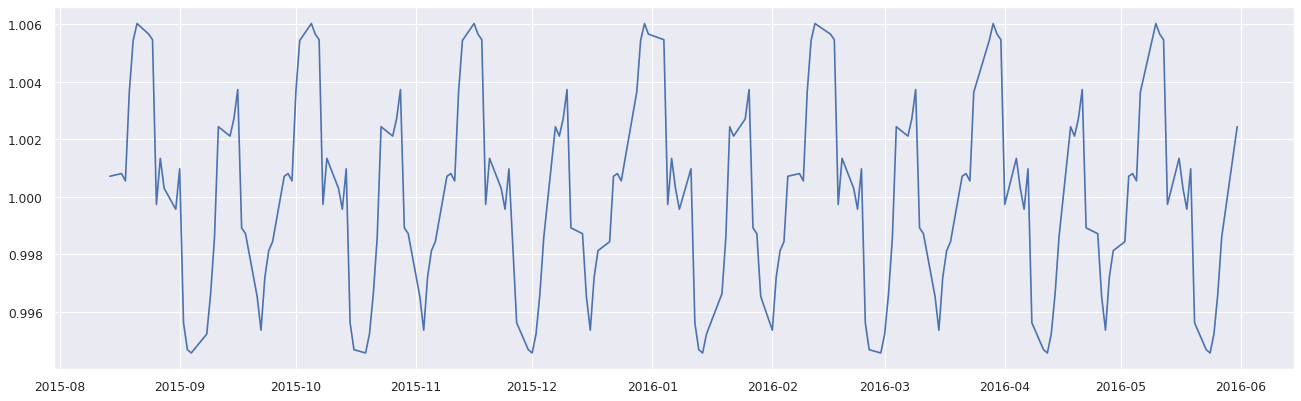

In [39]:
from matplotlib.pyplot import figure


figure(figsize=(20, 6), dpi=80)
#plt.grid()
#plt.xticks(np.arange(0, 201, 5))
plt.plot(result.seasonal[:200])

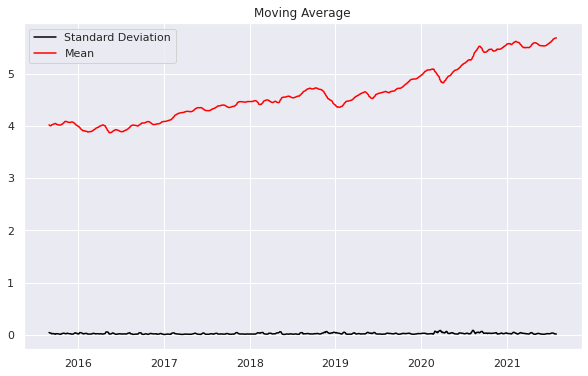

In [40]:
#it is not stationary so eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

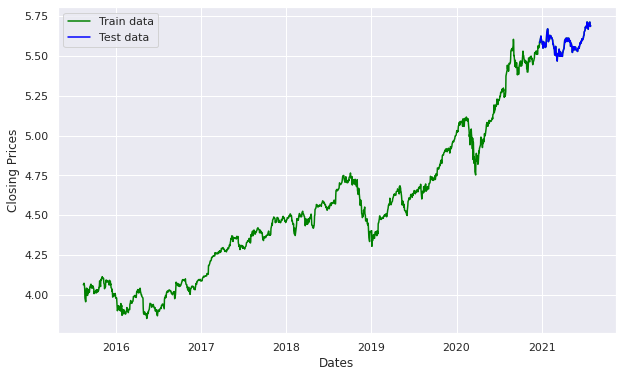

In [41]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

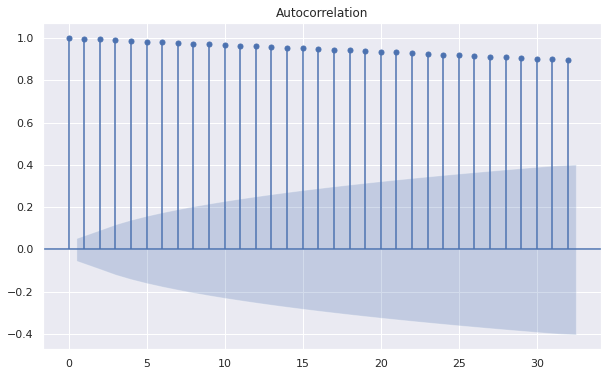

In [42]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(train_data)
pyplot.show()
#q=1

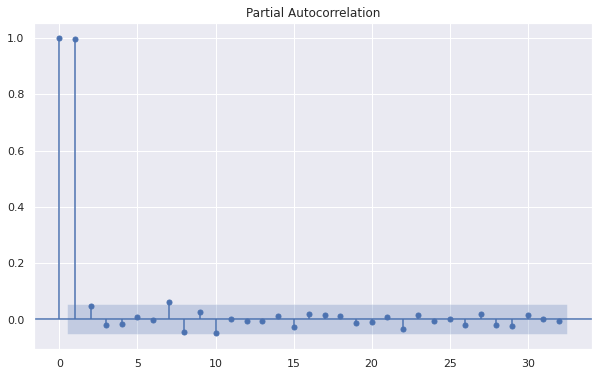

In [43]:
plot_pacf(train_data)
pyplot.show()
#p=1

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6982.372, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6997.587, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6996.860, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6979.034, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6996.020, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6996.117, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7008.457, Time=1.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6992.413, Time=0.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6991.921, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7005.225, Time=1.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6994.433, Time=0.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6990.522, Time=1.38 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6988.933, Time=0.19 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 8.861 seconds
         

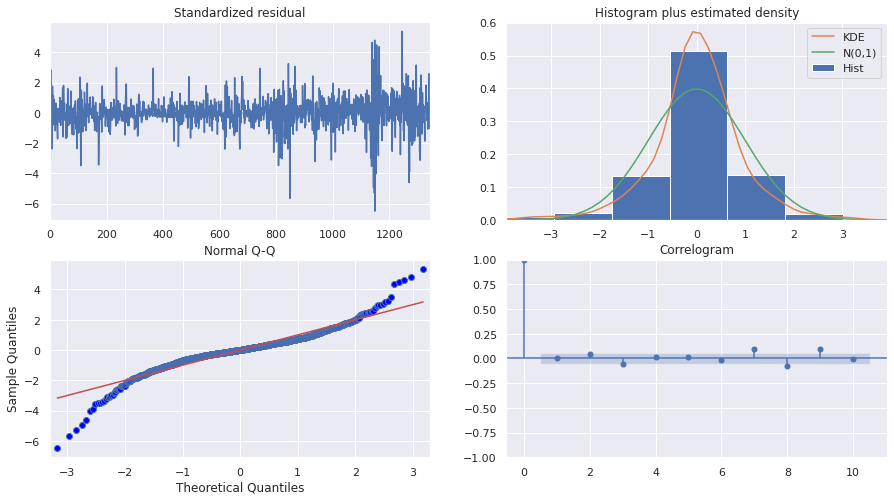

In [44]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0, test='adf',max_p=3, max_q=3, m=1, d=None, seasonal=False, start_P=0,D=0,trace=True,error_action='ignore', suppress_warnings=True, stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [45]:
# Build Model
model = ARIMA(train_data, order=(2,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1346
Model:                 ARIMA(2, 1, 1)   Log Likelihood                3502.059
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sat, 06 Nov 2021   AIC                          -6994.118
Time:                        15:25:31   BIC                          -6968.093
Sample:                             1   HQIC                         -6984.370
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      2.545      0.011       0.000       0.002
ar.L1.D.Close    -0.2810      0.497     -0.565      0.572      -1.256       0.694
ar.L2.D.Close     0.0004      0.064     

In [46]:
# Forecast
fc, se, conf = fitted.forecast(150, alpha=0.05)  # 95% conf

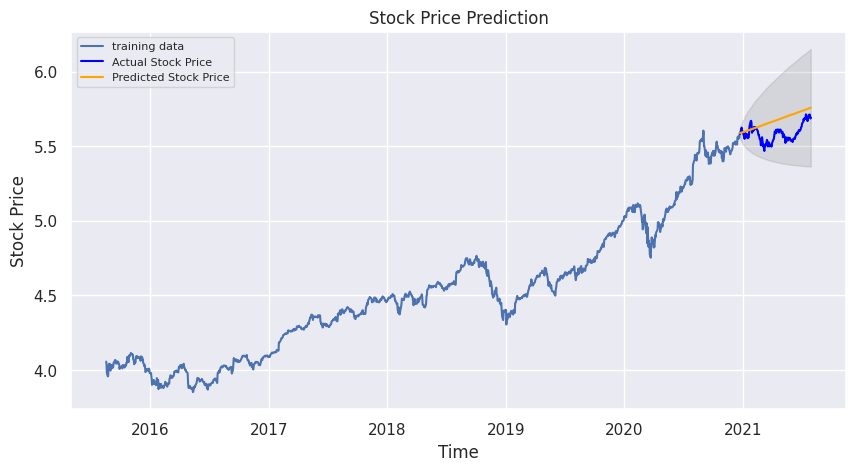

In [47]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))

RMSE: 0.10637887671812056


In [49]:
test_data

Date
2020-12-23    5.582350
2020-12-24    5.589888
2020-12-28    5.624384
2020-12-29    5.611223
2020-12-30    5.602817
                ...   
2021-07-23    5.709352
2021-07-26    5.712194
2021-07-27    5.697432
2021-07-28    5.685368
2021-07-29    5.689833
Name: Close, Length: 150, dtype: float64

FOR FULL TRAINING DATA

In [50]:
# Build Model
model = ARIMA(y, order=(2,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1499
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -3622.685
Method:                       css-mle   S.D. of innovations              2.712
Date:                Sat, 06 Nov 2021   AIC                           7255.370
Time:                        15:25:33   BIC                           7281.933
Sample:                             1   HQIC                          7265.266
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1584      0.064      2.469      0.014       0.033       0.284
ar.L1.D.Close    -0.4473      0.374     -1.196      0.232      -1.180       0.286
ar.L2.D.Close    -0.0119      0.053     

In [51]:
# Forecast
fc, se, conf = fitted.forecast(30, alpha=0.05)  # 95% conf

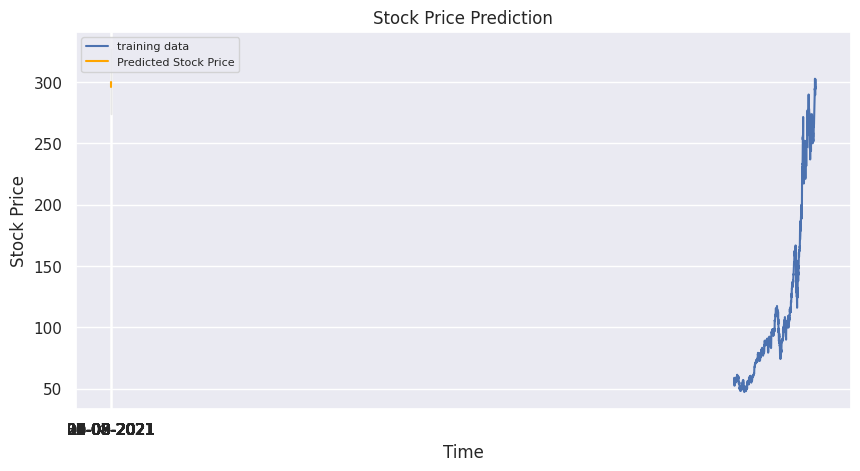

In [52]:
# Make as pandas series
fc_series = pd.Series(fc, index=x_t.index)
lower_series = pd.Series(conf[:, 0], index=x_t.index)
upper_series = pd.Series(conf[:, 1], index=x_t.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(y, label='training data')

plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [53]:
#RMSE FOR THIS MODEL WHEN SUBMITTED WAS 32.74 when we trained it for the entire training data to predict test data